# Lab 8 Numerical Quadrature
## Due: September 12th @ 11:59 pm

## Name: Anastasia Horne

## Student Number: 10867499

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import griddata

## Q1: Integrate a continuous time series

The integration techniques you've learned up to this point yield a single number as the result. Yet, in real-world applications, we often need to integrate over a time series to obtain another time series. For instance, one might convert particle acceleration to particle velocity, so that the measurement from an accelerator can be compared directly with that from a geophone.
For any given data point in this context:

$$
F(x) = \int_{x_0}^{x} f(\theta)d\theta, \hspace{1cm} for \ x=x_1, x_2, ..., x_n
$$
where $F$ represents the integral form of input $f$.


For such integrations, using a for-loop to compute each data point can be highly inefficient, wasting valuable computational resources. Instead, you can employ the np.cumsum function to swiftly execute rectangular integration. With minor tweaks and array slicing, the trapezoidal rule can be implemented in a similar manner.

Please perform numerical integration on the $\sin$ function between 0 and $\pi$, using both the rectangular and trapezoidal rules.
Discretize the interval into 100 data points.

C:\Users\anast\AppData\Local\Temp\ipykernel_79120\2073379198.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x+h/2, rect,'rx', label= "Rectangular", color= "red")
C:\Users\anast\AppData\Local\Temp\ipykernel_79120\2073379198.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[1:-1], trap,'ro', label="Trapezoidal", alpha=0.5, color="green")


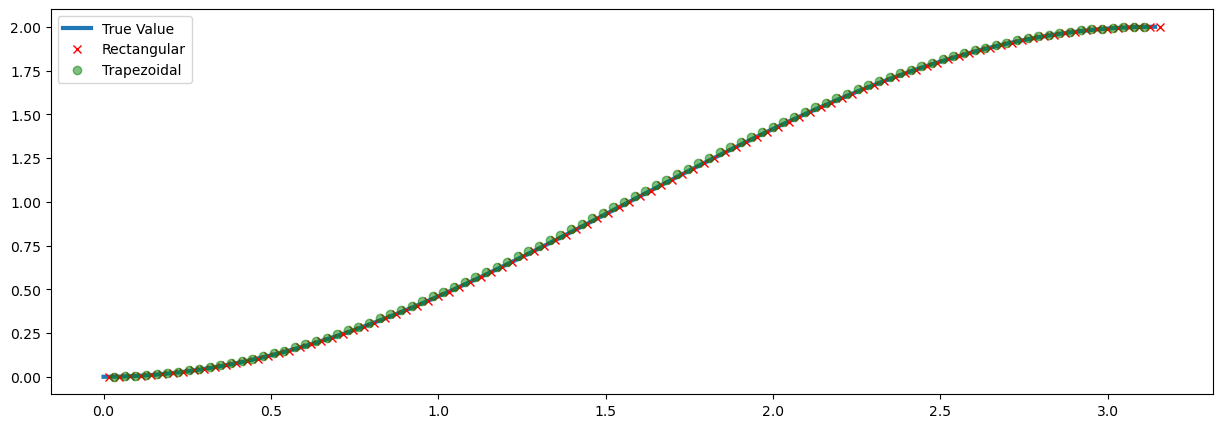

Difference between true valie and Rectangular rule: 0.9918599488586243
Difference between true valie and Trapezoidal rule: 0.9916921127526167


In [5]:
# Your answer to Q1
N=100
x= np.linspace(0, np.pi, N)
h= x[1]-x[0]
integrand= lambda x:np.sin(x)
rect = np.cumsum(integrand(x))*h

trap= h*(np.cumsum(integrand(x[1:-1])) + 0.5*integrand(x[0]) + 0.5*integrand(x[-1]))
# print(rect)
# print(trap)

#output the integrals against the true value,
true= -np.cos(x) + 1

plt.figure(figsize=(15,5))
plt.plot(x,true, linewidth=3, label="True Value")
plt.plot(x+h/2, rect,'rx', label= "Rectangular", color= "red")
plt.plot(x[1:-1], trap,'ro', label="Trapezoidal", alpha=0.5, color="green")
plt.legend()
plt.show()

#by discretizing to 100, we are giving the rules alot to work with, so they are very accurate.

print("Difference between true valie and Rectangular rule:",np.sum(np.abs(true-rect)))
print("Difference between true valie and Trapezoidal rule:",np.sum(np.abs(true[1:-1]-trap)))

## Q2: Calculate the area of a unit circle using 2D integration

This time, try to calculate the value of $\pi$ using 2D integration. Divide a rectangular spacing $-2 \leq x \leq 2, -2 \leq y \leq 2$ into even grids, and mark all the grid with center point inside the circle as 1, and outside the circle as 0. Calculate the integration of this function using Trapezoidal rule, which weights all the edge grids with 0.5 and inner grids with 1. Make plots to show how error and calculation time changes with grid size (resolution).

Perform the same practice for Monte-Carlo integration. Discuss how does the error changes with total evaluation number $N$.

In [7]:
#2D Trapezoidal Rule
def trap_2d(N):
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2, 2, N)
    h = x[1] - x[0] 

    # Set up circle grid
    circle = np.array([[1 if (xi**2 + yi**2 <= 1) else 0 for yi in y] for xi in x])
    weights = np.ones((N, N))

    # Apply weights
    for i in range(N):
        for j in range(N):
            if circle[i, j] == 1:
                if (x[i]**2 + y[j]**2 >= 1):  
                    weights[i, j] = 0.5

    # w_j,k * f(x_j,y_j,k)
    circle_w = circle * weights

    # Apply cumulative sum along both dimensions
    integral = np.cumsum(circle_w, axis=1)  # accumulate over y
    integral = np.cumsum(integral, axis=0)          # accumulate over x

    # assume h=h_j, get area at last interval
    area = (h * h) * np.sum(integral[-1, -1])  
    error= np.pi - area
    return area, error

In [8]:
#Monnte-Carlo Integration 
def monte_carlo(N):
    x = np.random.uniform(-2, 2, N)
    y = np.random.uniform(-2, 2, N)
    inside_circle = np.sum(x**2 + y**2 <= 4)
    area= (inside_circle / N) * 4
    error= np.pi - area
    return area, error

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  2.,  2.,  4.,  5.,  9., 11., 12., 10., 10., 13.,  7.,
         2.,  2.,  3.,  2.]),
 array([2.6       , 2.62488889, 2.64977778, 2.67466667, 2.69955556,
        2.72444444, 2.74933333, 2.77422222, 2.79911111, 2.824     ,
        2.84888889, 2.87377778, 2.89866667, 2.92355556, 2.94844444,
        2.97333333, 2.99822222, 3.02311111, 3.048     , 3.07288889,
        3.09777778, 3.12266667, 3.14755556, 3.17244444, 3.19733333,
        3.22222222, 3.24711111, 3.272     , 3.29688889, 3.32177778,
        3.34666667]),
 <BarContainer object of 30 artists>)

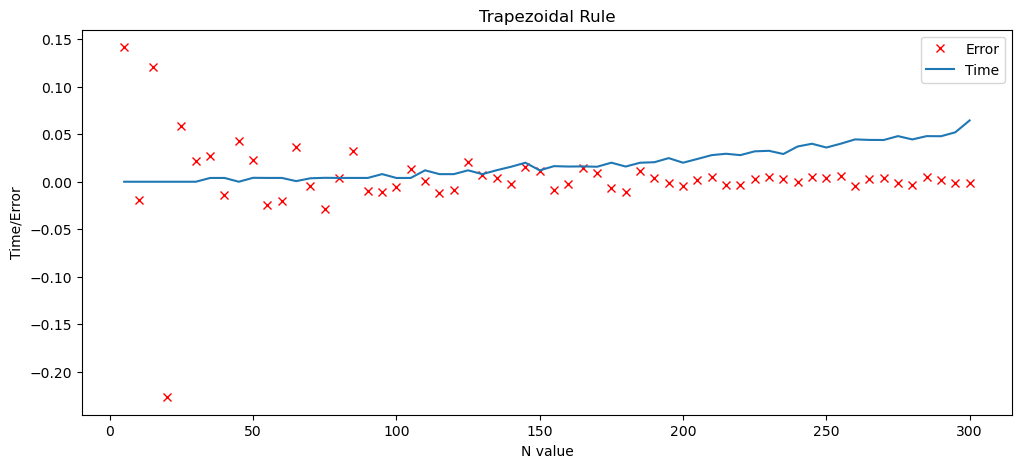

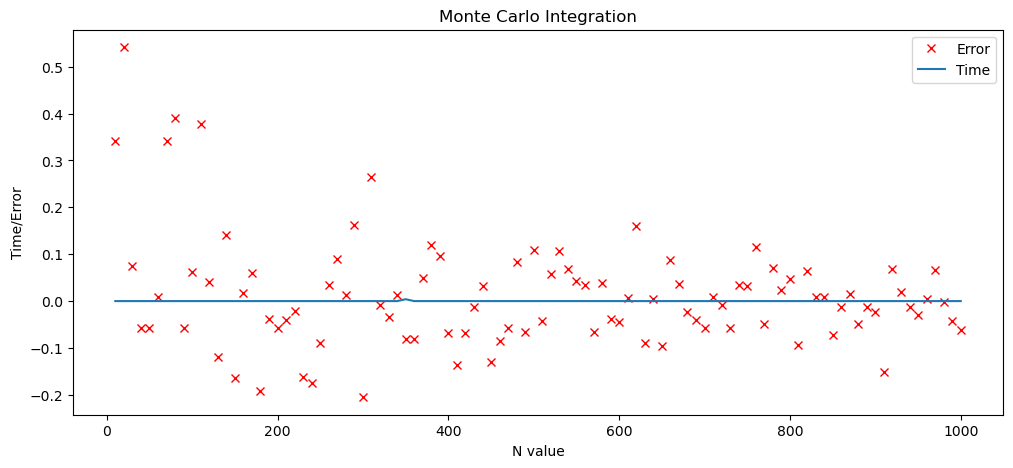

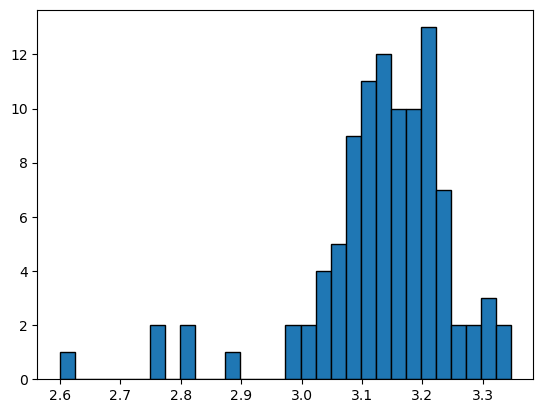

In [9]:
#trials code
Ns =np.arange(5, 301, 5)
N2 =np.arange(10, 1001, 10)
error_trap=[]
approx_trap=[]
time_trap=[]
time_mont=[]
error_mont=[]
approx_mont=[]
for N in Ns:
    start=time.time()
    approx, error = trap_2d(N)
    end=time.time()
    approx_trap.append(approx)
    error_trap.append(error)
    time_trap.append(end-start)

for N in N2:
    start=time.time()
    approx, error = monte_carlo(N)
    end=time.time()
    approx_mont.append(approx)
    error_mont.append(error)
    time_mont.append(end-start)

plt.figure(figsize=(12,5))
plt.plot(Ns, error_trap, 'rx',  label="Error")
plt.plot(Ns, time_trap, label="Time")
plt.legend()
plt.title("Trapezoidal Rule")
plt.xlabel("N value")
plt.ylabel("Time/Error")

plt.figure(figsize=(12,5))
plt.plot(N2, error_mont, 'rx',  label="Error")
plt.plot(N2, time_mont, label="Time")
plt.legend()
plt.title("Monte Carlo Integration")
plt.xlabel("N value")
plt.ylabel("Time/Error")

#check to make sure monte-carlo is approx normal
plt.figure()
plt.hist (approx_mont, bins=30, ec="black") 

For the **trapezoidal rule**, we see that the error decreases quickly and then remains around zero after $N\approx 50$, and as $N$ increases, the computation time increases exponentially. 

For **monte carlo integration**, computation time is not impacted by $N$. However, what we observe for change in error over $N$ is interesting. We see that as $N$ increases, the absolute error decreases. Specifically, we observe that as $N$ increases, points that lie above $error=0$ and points that lie below $error=0$ both converge towards $0$. Basically the error plot looks like as $N$ increases, the errors are getting squeezed/pushed towards zero.

# Q3: Calculate the water volume of Michigan Lake

The npz file provided contains three variables:
* lats: 1D numpy array of latitutes of data points
* lons: 1D numpy array of longitutes of data points
* elev: 1D numpy array of relative elevation, with 0 being the water level

Read in the data, use scatter plot to investigate the data structure. Use numerical integration to estimate the total water volume of the lake.

Tips:
* Interpolate the data points into a 2D grid using scipy.interpolate.griddata
* At this latitude, one degree of latitude has a different size than one degree of longitude.

The original data can be downloaded [here](https://www.ncei.noaa.gov/products/great-lakes-bathymetry).

<center><img src="https://glisa.umich.edu/wp-content/uploads/2021/03/Michigan_basin_map.jpg" alt="Image" width="300">




In [12]:
# download the data file
!gdown 1-stDn5XtK3vriL4q19-L85Dx981960oS

Downloading...
From: https://drive.google.com/uc?id=1-stDn5XtK3vriL4q19-L85Dx981960oS
To: C:\Users\anast\Documents\GPGN 536\Michigan_lake.npz

  0%|          | 0.00/5.41M [00:00<?, ?B/s]
 10%|9         | 524k/5.41M [00:00<00:01, 2.81MB/s]
 19%|#9        | 1.05M/5.41M [00:00<00:01, 3.36MB/s]
 29%|##9       | 1.57M/5.41M [00:00<00:01, 3.47MB/s]
 39%|###8      | 2.10M/5.41M [00:00<00:00, 3.70MB/s]
 58%|#####8    | 3.15M/5.41M [00:00<00:00, 4.53MB/s]
 78%|#######7  | 4.19M/5.41M [00:00<00:00, 5.01MB/s]
 97%|#########6| 5.24M/5.41M [00:01<00:00, 5.53MB/s]
100%|##########| 5.41M/5.41M [00:01<00:00, 4.72MB/s]


In [13]:
data = np.load('./Michigan_lake.npz')
lats = data['lats']
lons = data['lons']
elev = data['elev']

print(lats)
print(lons)
print(elev)

[46.09 46.09 46.09 ... 41.62 41.62 41.62]
[-88.       -87.916667 -87.833333 ... -84.72     -84.636667 -84.553333]
[       nan        nan        nan ... 107.94693   91.948761  90.950592]


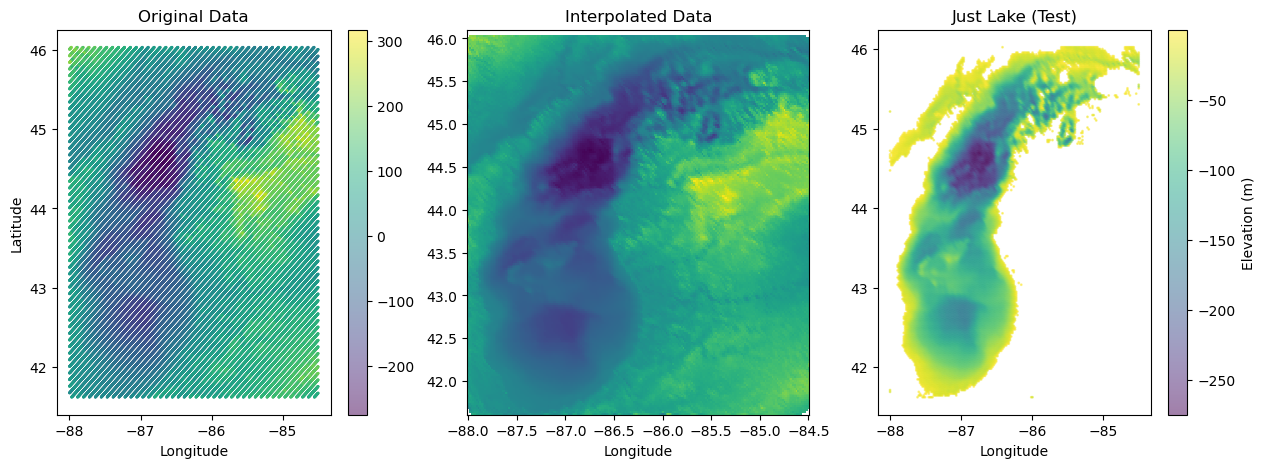

In [14]:
def interp_lake(lats, lons, elev):
    #Remove NaN values
    valid_mask = ~np.isnan(elev)
    valid_lats = lats[valid_mask]
    valid_lons = lons[valid_mask]
    valid_elev = elev[valid_mask]
    
    #create new grid
    grid_size = 200
    lon_grid, lat_grid = np.meshgrid(np.linspace(lons.min(), lons.max(), grid_size),  np.linspace(lats.min(), lats.max(), grid_size))
    
    #interpolation
    points = np.column_stack((valid_lons, valid_lats))
    elev_grid = griddata(points, valid_elev, (lon_grid, lat_grid), method='cubic')
    
    return lon_grid, lat_grid, elev_grid

def plot_lake(lats, lons, elev, lon_grid, lat_grid, elev_grid):
    plt.figure(figsize=(15, 5))
    
    # Plot original data points
    plt.subplot(131)
    valid_mask = ~np.isnan(elev) #remove nan
    scatter = plt.scatter(lons[valid_mask], lats[valid_mask], c=elev[valid_mask], cmap='viridis', s=1, alpha=0.5)
    plt.colorbar(scatter)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Original Data')
    
    # Plot interpolated surface
    plt.subplot(132)
    im = plt.pcolormesh(lon_grid, lat_grid, elev_grid, cmap='viridis', shading='auto')
    plt.xlabel('Longitude')
    plt.title('Interpolated Data')

    #anything above 0 elev. is land, and anything below is lake Michigan 
    plt.subplot(133)
    lake= elev_grid<0
    im = plt.scatter(lon_grid[lake], lat_grid[lake], c=elev_grid[lake], cmap='viridis',  s=1, alpha=0.5)
    plt.colorbar(im, label='Elevation (m)')
    plt.xlabel('Longitude')
    plt.title('Just Lake (Test)')

#interpolate and visulaize
lon_grid, lat_grid, elev_grid = interp_lake(lats, lons, elev)
plot_lake(lats, lons, elev, lon_grid, lat_grid, elev_grid)

In [15]:
#volume=sum(area*elevation/depth)
def lake_vol(lon, lat, elev):
    #anything above 0 elev. is land, and anything below is lake Michigan 
    lake = elev< 0

    R = 6371  #earth's radius
    con = np.pi / 180 #degrees to radians
    
    #get depths where the lake exists (in 2d array)
    depths = np.where(lake, -elev, 0)

    #latitude degrees are ~111 km
    lat_dist = np.abs(lat[1:, :] - lat[:-1, :]) * 111
    
    #longitude varies with latitude
    lon_scale = R * con * np.cos(np.deg2rad(lat[:-1, :-1]))
    lon_dist = np.abs(lon[:, 1:] - lon[:, :-1])
    
    #area (km^2)
    areas = lat_dist[:, :-1] * lon_dist[:-1, :] * lon_scale
    
    #volume (km^3)
    depth = depths[:-1, :-1]  # Use cell centers
    volumes = areas * depth / 1000  #/1000 for m->km
    
    #sum up volume
    volume = np.sum(volumes)
    
    return volume

volume= lake_vol(lon_grid, lat_grid, elev_grid)
print("Lake Michigan volume:", volume,"cubic kilometers")

Lake Michigan volume: 4900.566647356847 cubic kilometers


# GPGN536 Only: Calculate Gravity Anomaly Generated by the lake

Select a location around the center of the lake, calculate the gravity anormaly generated by the water body at 1000 m above the location. Assume the density of the water is 1000 kg/m3, and soil is 2000 kg/m3.

In [17]:
#lat~44.45 and lon~-87
lat_diff = np.abs(lat_grid- 44.5)
lat_idx = int(np.argmin(lat_diff)/200) #doesn't work if I do not divide by 200 (maybe in idx issue)
lon_diff = np.abs(lon_grid- -87)
lon_idx = np.argmin(lon_diff)

#constants
pw= 1000
ps= 2000
G= 6.6743e-11
r=1000

#check to make sure lat and lon indexes are correct
print(lon_grid[:,lon_idx])
print(lat_grid[lat_idx])

[-86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748744 -86.99748744 -86.99748744 -86.99748744 -86.99748744
 -86.99748

In [18]:
#calc anomaly (*1000 for km->m)
delta_g= (G*(pw-ps)*volume*1000)/(1000*elev_grid[lon_idx,lat_idx])**2
print("The gravity anomaly caused by the water is", delta_g, "m/s^2")

The gravity anomaly caused by the water is -9.831229225381654e-10 m/s^2
